In [1]:
# -*- coding: utf-8 -*-

from __future__ import division, unicode_literals

import re
import math
import networkx
import numpy as np

from konlpy import tag as taggers
from collections import Counter
from gensim.corpora import Dictionary, TextCorpus
from gensim.models import TfidfModel
from sklearn.cluster import Birch, DBSCAN, AffinityPropagation
from sklearn.feature_extraction import DictVectorizer


stopwords_ko = ["저", "것", "동시에", "몇", "고려하면", "관련이", "놀라다", "무엇", "어느쪽", "오", "정도의", "더구나", "아무도", "줄은모른다", "참", "아니", "휘익", "향하다", "응당", "알겠는가", "인젠", "그래서", "자신", "해서는", "둘", "이었다", "임에", "하도록시키다", "누구", "이때", "삼", "제외하고", "쿵", "하면", "좀", "그렇지않으면", "아니었다면", "이라면", "팍", "일", "통하여", "무엇때문에", "보아", "하게하다", "하는", "이르다", "타다", "까지도", "오직", "도달하다", "잠깐", "외에", "심지어", "하려고하다", "게다가", "후", "알", "비하면", "헉헉", "근거로", "월", "따라서", "않는다면", "일지라도", "함께", "이유는", "흥", "혼자", "관하여", "붕붕", "하다", "진짜로", "의해", "바와같이", "대하면", "퍽", "보다더", "그렇게", "끼익", "댕그", "시초에", "당장", "하는것만", "누가", "만이", "만일", "이지만", "하마터면", "꽈당", "만은", "우선", "없다", "휴", "하도록하다", "그런데", "비로소", "하게될것이다", "만큼 어찌됏든", "오히려", "을", "더라도", "안", "왜냐하면", "습니다", "줄은", "그리하여", "하", "어떻게", "대로", "기대여", "끙끙", "예를", "와르르", "이리하여", "이", "조차", "하고", "이젠", "뒤이어", "할줄알다", "반대로", "시각", "펄렁", "잇따라", "공동으로", "비록", "가까스로", "여덟", "비슷하다", "이상", "차라리", "이어서", "모두", "툭", "조차도", "헉", "부터", "혹시", "않고", "우리", "삐걱", "여보시오", "허", "해요", "견지에서", "하기는한데", "토하다", "않으면", "이봐", "관계가", "한다면", "시작하여", "연이서", "이외에도", "그", "운운", "에게", "그럼에도", "예", "만약에", "했어요", "결과에", "제", "오자마자", "것들", "약간", "것과", "일때", "셋", "각종", "아이구", "같은", "향해서", "일것이다", "해야한다", "아이야", "로", "편이", "등등", "해도좋다", "하기에", "김에", "몰랏다", "같이", "하도다", "즉시", "갖고말하자면", "우에", "어느", "허허", "하자마자", "에서", "그래도", "하여야", "된이상", "까악", "한켠으로는", "많은", "그중에서", "사", "낼", "뿐만", "저쪽", "어쩔수", "어떤것들", "물론", "결론을", "이만큼", "이렇게되면", "소인", "바꾸어말하면", "들", "이렇구나", "하물며", "얼마간", "얼마든지", "한항목", "하는것도", "졸졸", "한마디", "말할것도", "만약", "남들", "총적으로", "허걱", "그리고", "따지지", "구체적으로", "못하다    하기보다는", "언제", "따르는", "구토하다", "앞에서", "대해서", "아", "앞의것", "비걱거리다", "헐떡헐떡", "어찌하든지", "입장에서", "의", "마저", "바로", "하기만", "않기", "또한", "쓰여", "위해서", "의거하여", "인", "아니면", "를", "사람들", "할수있다", "일곱", "근거하여", "한적이있다", "함으로써", "낫다", "어떤것", "방면으로", "중의하나", "어", "무릎쓰고", "저것만큼", "서술한바와같이", "그런즉", "들자면", "하지", "아이고", "불문하고", "만", "마저도", "얼마만큼", "예컨대", "이렇게말하자면", "연관되다", "않다면", "들면", "이쪽", "의지하여", "여섯", "그저", "아니다", "그렇지만", "기준으로", "되어", "가", "무렵", "즉", "말하면", "어찌", "그럼", "그위에", "그런", "조금", "매번", "혹은", "이천구", "중에서", "따름이다", "하기", "가령", "잠시", "아무거나", "하기보다는", "주저하지", "당신", "봐라", "그렇지", "자기집", "할지라도", "요만한걸", "우르르", "못하다", "왜", "이렇게", "퉤", "관계없이", "그래", "대해", "쪽으로", "저것", "자기", "아홉", "지만", "구", "하지마", "따위", "하지만", "나", "해도", "전자", "그만이다", "안된다", "까닭으로", "되다", "오르다", "딱", "다음에", "너희들", "점에서", "아이쿠", "쾅쾅", "종합한것과같이", "할수있어", "그치지", "비교적", "륙", "되는", "개의치않고", "엉엉", "하든지", "때가", "영차", "바꿔", "더불어", "주룩주룩", "따라", "이용하여", "우리들", "여기", "더욱이는", "하더라도", "입각하여", "여러분", "마치", "하느니", "너", "어디", "제각기", "밖에", "봐", "위하여", "팔", "요만큼", "가서", "아니라면", "지든지", "참나", "할만하다", "타인", "든간에", "하겠는가", "거바", "겨우", "다음", "이러한", "이럴정도로", "각자", "어때", "지말고", "형식으로", "그러한즉", "아니나다를가", "할", "불구하고", "지경이다", "어떠한", "기점으로", "할때", "등", "다시", "시키다", "답다", "소생", "라", "로써", "각", "부류의", "알았어", "훨씬", "위에서", "뿐이다", "시간", "그러나", "하곤하였다", "일단", "막론하고", "좋아", "솨", "이곳", "뿐만아니라", "아울러", "옆사람", "다수", "예하면", "령", "어떤", "어떻해", "할수록", "말하자면", "전후", "메쓰겁다", "에", "으로써", "이번", "하면된다", "이것", "딩동", "양자", "달려", "본대로", "탕탕", "마음대로", "쉿", "미치다", "다시말하면", "동안", "그러니까", "과연", "뚝뚝", "거의", "이천팔", "이로", "않도록", "또", "한하다", "아래윗", "수", "다소", "어느것", "까지", "남짓", "저기", "관한", "무슨", "그에", "년도", "삐걱거리다", "이러이러하다", "와", "넷", "쳇", "논하지", "습니까", "이천육", "기타", "오로지", "어느곳", "설령", "할지언정", "칠", "다만", "반드시", "한데", "곧", "의해서", "얼마나", "아니라", "상대적으로", "너희", "있다", "인하여", "다섯", "생각이다", "몰라도", "정도에", "버금", "까닭에", "얼마큼", "전부", "로부터", "힘입어", "틈타", "해도된다", "나머지는", "흐흐", "그때", "하여금", "모", "이런", "바꾸어서", "비추어", "각각", "설사", "이래", "비길수", "하지마라", "응", "다른", "듯하다", "보는데서", "어쨋든", "대하여", "좍좍", "으로", "여차", "틀림없다", "과", "고로", "요컨대", "일반적으로", "줄", "하는바", "그들", "요만한", "윙윙", "콸콸", "어기여차", "언젠가", "이와", "할망정", "이천칠", "네", "없고", "둥둥", "겸사겸사", "그러므로", "안다", "거니와", "년", "여부", "때문에", "된바에야", "향하여", "때", "하하", "및", "오호", "하면서", "더군다나", "한", "이유만으로", "어이", "하나", "저희", "더욱더", "두번째로", "바꾸어말하자면", "이와같다면", "이르기까지", "단지", "그러면", "야", "결국", "영", "뒤따라", "즈음하여", "도착하다", "와아", "다음으로", "같다", "자", "아하", "생각한대로", "외에도", "의해되다", "설마", "으로서", "보면", "할뿐", "첫번째로", "아야", "어째서", "하는것이", "하구나", "않다", "힘이", "육", "그러니", "여전히", "어찌됏어", "어찌하여", "어느해", "앗", "게우다", "보드득", "관해서는", "자마자", "매", "하고있었다", "어느때", "여", "실로", "해봐요", "얼마", "아이"]


class LexRankError(Exception):
    pass


class Sentence(object):

    def __init__(self, text, tokens=[], index=0):
        self.index = index
        self.text = text
        self.tokens = tokens
        self.counter = Counter(self.tokens)
        self.pagerank = 0

    def __unicode__(self):
        return self.text

    def __str__(self):
        return str(self.index)

    def __repr__(self):
        try:
            return self.text.encode('utf-8')
        except:
            return self.text

    def __eq__(self, another):
        return hasattr(another, 'index') and self.index == another.index

    def __hash__(self):
        return self.index
    
class Token(object):

    def __init__(self, index, word, tag):
        self.index = index
        self.word = word
        self.tag = tag
        self.tfidf = 0

    def __unicode__(self):
        return self.word

    def __str__(self):
        return self.word

    def __repr__(self):
        try:
            return self.word.decode('utf8')
        except:
            return self.word

    def __eq__(self, another):
        return hasattr(another, 'index') and self.index == another.index

    def __hash__(self):
        return self.index


class SentenceFactory(object):

    def __init__(self, tagger, useful_tags, delimiters, min_token_length, stopwords, **kwargs):
        if tagger == 'twitter':
            self.tagger = taggers.Twitter()
            self.tagger_options = {
                'norm': bool(kwargs.get('norm', True)),
                'stem': bool(kwargs.get('stem', True)),
            }
        elif tagger == 'komoran':
            self.tagger = taggers.Komoran()
            self.tagger_options = {
                'flatten': bool(kwargs.get('flatten', True)),
            }
        elif tagger == 'hannanum':
            self.tagger = taggers.Hannanum()
            self.tagger_options = {
                'ntags': int(kwargs.get('ntags', 9)),
                'flatten': bool(kwargs.get('flatten', True)),
            }
        elif tagger == 'kkma':
            self.tagger = taggers.Kkma()
            self.tagger_options = {
                'flatten': bool(kwargs.get('flatten', True)),
            }
        elif tagger == 'mecab':
            self.tagger = taggers.Mecab()
            self.tagger_options = {
                'flatten': bool(kwargs.get('flatten', True)),
            }
        else:
            raise LexRankError("available taggers are: twitter, komoran, hannanum, kkma, mecab")
        self.useful_tags = useful_tags
        self.delimiters = delimiters
        self.stopwords = stopwords
        self.min_token_length = min_token_length
        self.splitter = self.splitterer()
        self.pos = lambda text: self.tagger.pos(text, **self.tagger_options)

    def splitterer(self):
        escaped_delimiters = '|'.join([re.escape(delimiter) for delimiter in self.delimiters])
        return lambda value: re.split(escaped_delimiters, value)

    def text2tokens(self, text, idx):
        tokens = []
        word_tag_pairs = self.pos(text)
        for word, tag in word_tag_pairs:
            if word in self.stopwords:
                continue
            if tag not in self.useful_tags:
                continue
          #  tokens.append("{}/{}".format(word, tag))
            tokens.append(Token(idx, word, tag))
        return tokens

    def text2sentences(self, text):
        candidates = self.splitter(text.strip())
        sentences = []
        index = 0
        for candidate in candidates:
            while len(candidate) and (candidate[-1] == '.' or candidate[-1] == ' '):
                candidate = candidate.strip(' ').strip('.')
            if not candidate:
                continue
            tokens = self.text2tokens(candidate, index)
            if len(tokens) < self.min_token_length:
                continue
            sentence = Sentence(candidate, tokens, index)
            sentences.append(sentence)
            index += 1
        return sentences


class SentenceCorpus(TextCorpus):

    def __init__(self, sentences, no_below=3, no_above=0.8, max_size=None):
        self.metadata = False
        self.sentences = sentences
        self.dictionary = Dictionary(self.get_texts(), prune_at=max_size)
        self.dictionary.filter_extremes(no_below=no_below, no_above=no_above, keep_n=max_size)
        self.dictionary.compactify()
        self.bows = [self.dictionary.doc2bow(tokens) for tokens in self.get_texts()]

    def get_texts(self):
        for sentence in self.sentences:
            yield map(str, sentence.tokens)


class LexRank(object):
    
    def __init__(self, similarity='cosine', decay_window=20, decay_alpha=0.25, clustering='dbscan', tagger='twitter', useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'Josa', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'], delimiters=['. ', '\n', '.\n'], min_token_length=2, stopwords=stopwords_ko, no_below_word_count=2, no_above_word_portion=0.85, max_dictionary_size=None, min_cluster_size=2, similarity_threshold=0.85, matrix_smoothing=False, n_clusters=None, compactify=True, **kwargs):
        self.decay_window = decay_window
        self.decay_alpha = decay_alpha
        if similarity == 'cosine':  # very, very slow :(
            self.vectorizer = DictVectorizer()
            self.uniform_sim = self._sim_cosine
        elif similarity == 'jaccard':
            self.uniform_sim = self._sim_jaccard
        elif similarity == 'normalized_cooccurrence':
            self.uniform_sim = self._sim_normalized_cooccurrence
        else:
            raise LexRankError("available similarity functions are: cosine, jaccard, normalized_cooccurrence")
        self.sim = lambda sentence1, sentence2: self.decay(sentence1, sentence2) * self.uniform_sim(sentence1, sentence2)
        self.factory = SentenceFactory(tagger=tagger, useful_tags=useful_tags, delimiters=delimiters, min_token_length=min_token_length, stopwords=stopwords, **kwargs)
        if clustering == 'birch':
            self._birch = Birch(threshold=0.99, n_clusters=n_clusters)
            self._clusterer = lambda matrix: self._birch.fit_predict(1 - matrix)
        elif clustering == 'dbscan':
            self._dbscan = DBSCAN()
            self._clusterer = lambda matrix: self._dbscan.fit_predict(1 - matrix)
        elif clustering == 'affinity':
            self._affinity = AffinityPropagation()
            self._clusterer = lambda matrix: self._affinity.fit_predict(1 - matrix)
        elif clustering is None:
            self._clusterer = lambda matrix: [0 for index in range(matrix.shape[0])]
        else:
            raise LexRankError("available clustering algorithms are: birch, markov, no-clustering(use `None`)")
        self.no_below_word_count = no_below_word_count
        self.no_above_word_portion = no_above_word_portion
        self.max_dictionary_size = max_dictionary_size
        self.similarity_threshold = similarity_threshold
        self.min_cluster_size = min_cluster_size
        self.matrix_smoothing = matrix_smoothing
        self.compactify = compactify
        self.mine_tfidf = []
    def one_vector(self):
        res = []
        for i in range(self.num_sentences-1):
            s1 = {word_id: tfidf for word_id, tfidf in self.sentences[i].tfidf}
            s2 = {word_id: tfidf for word_id, tfidf in self.sentences[i].tfidf}
            vector1, vector2 = self.vectorizer.fit_transform([s1, s2]).toarray()
            res.append([vector1,vector2])
            print("문장[{}], 문장[{}]: tfidf \n{} \n{}".format(i,i+1,s1,s2), end='\n')
            print("문장[{}], 문장[{}]: vector\n{} \n{}".format(i,i+1,vector1,vector2), end='\n\n')           
        return res
    
    def print_vector(self, size=5):
        res = []
        for i in range(self.num_sentences-size-1):
            s1 = {}
            s2 = {}
            for j in range(size):
                s1.update({word_id*10+i+j: tfidf for word_id, tfidf in self.sentences[i+j].tfidf})
                s2.update({word_id*10+i+j+1: tfidf for word_id, tfidf in self.sentences[i+j+1].tfidf})
            vector1, vector2 = self.vectorizer.fit_transform([s1, s2]).toarray()
            res.append([vector1,vector2])
            print("문장[{}-{}], 문장[{}-{}]: tfidf \n{} \n{}".format(i,i+size,i+1,i+1+size,s1,s2), end='\n')
            print("문장[{}-{}], 문장[{}-{}]: vector\n{} \n{}".format(i,i+size,i+1,i+1+size,vector1,vector2), end='\n\n')           
        return res
    

        
        
    def summarize(self, text):
        self.sentences = self.factory.text2sentences(text)
        self.num_sentences = len(self.sentences)
        self.corpus = SentenceCorpus(self.sentences, self.no_below_word_count, self.no_above_word_portion, self.max_dictionary_size)
        self.model = TfidfModel(self.corpus.bows, id2word=self.corpus.dictionary, normalize=True)
        self.tfidfs = self.model[self.corpus.bows]
        self._inject_tfidfs()
        self._build_matrix()
        self._clustering()
        if self.compactify:
            self._compactify()
        self.graphs = []
        for i in range(self.num_clusters):
            graph = self.sentences2graph(self.clusters[i])
            pagerank = networkx.pagerank(graph, weight='weight')
            for k, v in pagerank.items():
                   k.pagerank = v
            self.clusters[i] = sorted(pagerank, key=pagerank.get, reverse=True)
            self.graphs.append(graph)

    def _sim_jaccard(self, sentence1, sentence2):
        if sentence1 == sentence2:
            return 1
        p = sum((sentence1.counter & sentence2.counter).values())
        q = sum((sentence1.counter | sentence2.counter).values())
        return p / q if q else 0

    def _sim_cosine(self, sentence1, sentence2):
        if sentence1 == sentence2:
            return 1
        sentence1_tfidf = {word_id: tfidf for word_id, tfidf in sentence1.tfidf}
        sentence2_tfidf = {word_id: tfidf for word_id, tfidf in sentence2.tfidf}
        vector1, vector2 = self.vectorizer.fit_transform([sentence1_tfidf, sentence2_tfidf]).toarray()
#         if sentence1_tfidf not in self.mine_tfidf:
#             self.mine_tfidf.append(sentence1_tfidf)
#         elif sentence2_tfidf not in self.mine_tfidf:
#             self.mine_tfidf.append(sentence2_tfidf)
        return vector1.dot(vector2)

    def build_tf_matrix(self):
        self.tf_list = []
        for s in self.sentences:
            self.tf_list.append({word_id: tfidf for word_id, tfidf in s.tfidf})
        self.tf_matrix = np.zeros((self.num_sentences, len(self.corpus.dictionary)))
        for i,d in enumerate(self.tf_list):
            for k,v in d.items():
                self.tf_matrix[i,k] = v
        return self.tf_matrix

    def _sim_normalized_cooccurrence(self, sentence1, sentence2):
        if sentence1 == sentence2:
            return 1
        return len(set(sentence1.tokens) & set(sentence2.tokens)) / (math.log(len(sentence1.tokens)) + math.log(len(sentence2.tokens)))

    def decay(self, sentence1, sentence2):
        distance = abs(sentence1.index - sentence2.index)
        closeness = max(self.decay_window - distance, 0) / self.decay_window
        return math.pow(closeness, self.decay_alpha)

    def _inject_tfidfs(self):
        for index in range(self.num_sentences):
            bow = self.corpus.bows[index]
            self.sentences[index].bow = bow
            self.sentences[index].tfidf = self.model[bow]

    def _build_matrix(self):
        self.matrix = np.zeros((self.num_sentences, self.num_sentences))
        for sentence1 in self.sentences:
            for sentence2 in self.sentences:
                self.matrix[sentence1.index, sentence2.index] = self.sim(sentence1, sentence2)
        if self.matrix_smoothing:
            for index in range(self.num_sentences):
                self.matrix[index, index] = 0
                self.matrix[index, index] = max(self.matrix[index])

    def sentences2graph(self, sentences):
        graph = networkx.Graph()
        graph.add_nodes_from(sentences)
        for sentence1 in sentences:
            for sentence2 in sentences:
                weight = self.matrix[sentence1.index, sentence2.index]
                if weight:
                    graph.add_edge(sentence1, sentence2, weight=weight)
        return graph

    def _clustered(self):
        self.clusters = [cluster for cluster in self.clusters if len(cluster) >= self.min_cluster_size]
        self.num_clusters = len(self.clusters)
        self.clusters = sorted(self.clusters, key=lambda cluster: len(cluster), reverse=True)

    def _clustering(self):
        cls = self._clusterer(self.matrix)
        bucket = {}
        for index in range(len(cls)):
            key = str(cls[index])
            if key not in bucket:
                bucket[key] = []
            bucket[key].append(self.sentences[index])
        self.clusters = bucket.values()
        self._clustered()

    def _compactify(self):
        clusters = []
        for cluster in self.clusters:
            compact_cluster = []
            cluster_size = len(cluster)
            for i in range(cluster_size):
                cluster[i].duplicated = False
            for i in range(cluster_size):
                if cluster[i].duplicated:
                    continue
                for j in range(i + 1, cluster_size):
                    if cluster[j].duplicated:
                        continue
                    if self.uniform_sim(cluster[i], cluster[j]) > self.similarity_threshold:
                        cluster[j].duplicated = True
                compact_cluster.append(cluster[i])
            clusters.append(compact_cluster)
        self.clusters = clusters
        self._clustered()

    def _verbose(self):
        summaries = sorted(self.summaries, key=lambda sentence: sentence.index)
        return [sentence.text for sentence in summaries]

    def probe(self, k=None):
        if not hasattr(self, 'clusters'):
            raise LexRankError("summarize it first")
        if not k:
            k = max(2, self.num_clusters)
        if k < 0:
            raise LexRankError("appropriate value for `k`: float(0 ~ 1) for compress rate, or natural number for exact number of sentences")
        if k > self.num_sentences:
            raise LexRankError("this will not give a summarization")
        if k < 1:
            k = int(self.num_sentences * k)
        self.summaries = []
        ends = np.array([len(cluster) for cluster in self.clusters])
        drones = np.zeros(ends.shape)
        for i in range(self.num_clusters):
            self.summaries.append(self.clusters[i][0])
            drones[i] += 1
            if len(self.summaries) == k:
                return self._verbose()
        while True:
            branch = np.array([drones + 1, ends]).min(axis=0) / ends
            leach = int(branch.argmin())
            drone = int(drones[leach])
            self.summaries.append(self.clusters[leach][drone])
            drones[leach] += 1
            if len(self.summaries) == k:
                return self._verbose()

C:\Users\hm334\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
f = open("C:/Users/hm334/OneDrive/Desktop/한이음_데이터/6CM00079-학교_본데이터.txt", 'rt', encoding='utf-16')
talk1 = []

while(True):
    data = f.readline() 
    if not data: break
    
    if("<s n=" in data):

        # 대화 추출
        temp = data.split(">")
        s = ""
        for v in temp:
            idx = v.find('<')
            if idx < 2: continue
            talk1.append(v[:idx])
f = open("C:/Users/hm334/OneDrive/Desktop/한이음_데이터/6CM00082_대통령선거_본데이터.txt", 'rt', encoding='utf-16')
talk2 = []

while(True):
    data = f.readline() 
    if not data: break
    
    if("<s n=" in data):

        # 대화 추출
        temp = data.split(">")
        s = ""
        for v in temp:
            idx = v.find('<')
            if idx < 2: continue
            talk2.append(v[:idx]) 

f = open("C:/Users/hm334/OneDrive/Desktop/한이음_데이터/5CM00044_직장생활_본데이터.txt", 'rt', encoding='utf-16')
talk3 = []

while(True):
    data = f.readline() 
    if not data: break
    
    if("<s n=" in data):

        # 대화 추출
        temp = data.split(">")
        s = ""
        for v in temp:
            idx = v.find('<')
            if idx < 2: continue
            talk2.append(v[:idx]) 


In [3]:
sentences=[]
sentences.extend(talk1)
sentences.extend(talk2)
sentences.extend(talk3)

In [5]:
from konlpy.tag import Kkma
kkma = Kkma()

In [9]:
sentences=kkma.sentences(" ".join(sentences))

In [11]:
lexrank=LexRank(clustering='birch',useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'])

C:\Users\hm334\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [12]:
summary=lexrank.summarize(" ".join(sentences))

In [13]:
sen = []
for s in lexrank.sentences:
    sen.append(s.text)
sen

['음~ 제가 교생 실습 갔다 온 얘기 해 드릴게요, 그래, 되게 궁금하다, 아~ 그래 갖구::, 저희 교생이 되게 많았었거든요::, 그런데 저는, 인제, 제가 나이가 제일 어렸어요 ::, 생각보다 나이 많은 사람들이 되게 많았거든요? 음 음, 언니는 구오, 구오 학번, 아 유~, 그런 얘기를 여기서 하면, 구오 학번까지 막~, 음::, 그래 갖구, 근데, 저는 졸업한 지 사 년밖에 안 돼서::, 나도 되게 어리다고 생각을 했었는데, 애들을 보니까 세대 차이가 엄청 나는 거예요, 음::, 걔네들은 정말, 걔들이 메일을 보내면 진짜 못 읽겠는 거예요 막, 난 읽을 줄 아는데, 머~ 아리용, 아리용이 무슨 뜻이에요? 아리용? 음 음, 선생님 아리용 맨날 그러는데 무슨 말인지 몰라 가지고, 모르겠다, 사투리 아니야? 어, 아니에요, 아니거든요, 선생님 아 룡? 어, 아 룡? 어, 아리용:: 맨날, 아리 영 아리 영 그거 아니야? 인어 아가씨에 나오는 거? 그래 가지고 맨날 그러고, 어, 특수문자도 엄청 많이 쓰고, 문자를 보 내도 알아볼 수가 없는, 음::, 막 그런 문자를 쓰고, 인기가 많았다는 것을, 아예 문자 잘 안 오는데, 막 남자 교생들은::, 걔네들이 음료수 맨날 뽑아 주고::, 여자 중학교? 여자 고등학교, 고등학교, 그렇지, 이해해 줘야지, 걔네들은 정말 남자 교생들은 쌓아 놓고 먹고, 우리는 뽑아 먹고, 남자 교생이 안 줘 재향이, 음, 문제 있네, 받은 받은 거라고, 못 준대요, 그랬어요, 어~ 근데 교생 실습 나가 가지구::, 우리 그~ 교육 문제를 우리가, 교실 안에서만 배우다가::, 현장에 직접, 음, 가 본 거잖아? 근데 나는 실습을 못 나가봤기 때문에::, 음, 그런 게 궁금한 데::, 가르쳐 보면서 가장, 문제가 됐다고 생각하는 점 있어? 그니까 애들이 공부를 안 해요, 음, 공부를 안 한다, 음, 우리 때보다 훨:: 씬 안 하는 거 같아요, 그~ 혹시 그 학교가, 원래 그~, 인문계 중에서도, 근 까 어, 시험 보고 들어가는 학교, 요

In [14]:
all_tokens = []
for s in lexrank.sentences:
    all_tokens.extend(s.tokens)

In [15]:
token_list = [lexrank.sentences[i].tokens for i in range(lexrank.num_sentences)]
token_len_list = [len(lexrank.sentences[i].tokens) for i in range(lexrank.num_sentences)]
mean_token = sum(token_len_list)//len(token_len_list)
mean_token
step_size=mean_token
one_topic=round(len(all_tokens)*0.2)
#print(step_size)
#print(one_topic)
neighbors=round(one_topic/step_size)
window_size=round(one_topic/2)
#print(neighbors)
#print(window_size)
token_list_word = []
for i, x in enumerate(token_list):
    tmp = [y.word for y in x]
    token_list_word.append(tmp)

In [16]:
token_list_allword = []
for sen in lexrank.sentences:
    token_list_allword.extend(sen.tokens)
token_list_allword[:5]

[음, 교생, 실습, 가다, 온]

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidv = TfidfVectorizer().fit(map(str, token_list_allword))
def l2_norm(a):
    return math.sqrt(np.dot(a, a))

def cosine_similarity_def(a, b):
    return np.dot(a,b) / (l2_norm(a) * l2_norm(b))

In [18]:
start = 0
mid = window_size
end = mid+window_size
vec_to_sim = []
stop = False
while(stop==False):
    if(end > len(all_tokens)):
        new_win = (len(all_tokens)-start)//2
        mid = start + new_win
        end = mid + new_win
        stop = True
    elif(end==len(all_tokens)):
         stop = True
    b1 = tfidv.transform([" ".join(map(str, token_list_allword[start:mid]))]).toarray().reshape(-1)
    b2 = tfidv.transform([" ".join(map(str, token_list_allword[mid:end]))]).toarray().reshape(-1)
    print(start, mid, end)
    
    vec_to_sim.append(cosine_similarity_def(b1,b2))
    print(cosine_similarity_def(b1,b2))
    
    start = start+step_size
    mid = start+window_size
    end = mid+window_size

0 592 1184
0.45545897219656784
23 615 1207
0.45331970588085596
46 638 1230
0.4701580984985795
69 661 1253
0.49762066559582907
92 684 1276
0.5403471248881605
115 707 1299
0.5513916511198229
138 730 1322
0.5493099400666247
161 753 1345
0.53586433018123
184 776 1368
0.5163565212474132
207 799 1391
0.5269555779720471
230 822 1414
0.5108716468530953
253 845 1437
0.4869259714121611
276 868 1460
0.48670721641655973
299 891 1483
0.48072107178593493
322 914 1506
0.5115535507331381
345 937 1529
0.5267784706114953
368 960 1552
0.5223140262546756
391 983 1575
0.5204563855523394
414 1006 1598
0.507779430530654
437 1029 1621
0.5137884353307801
460 1052 1644
0.49404319289226145
483 1075 1667
0.4882290764126619
506 1098 1690
0.45339289172506914
529 1121 1713
0.468836309085871
552 1144 1736
0.45565705201538836
575 1167 1759
0.4670488387169554
598 1190 1782
0.45394778539942987
621 1213 1805
0.44785550575355293
644 1236 1828
0.4633699287257838
667 1259 1851
0.47037393393074295
690 1282 1874
0.48154087383

In [19]:
start = 0
mid = window_size
end = mid+window_size
vec_to_sim_dic = {}
stop = False
while(stop==False):
    if(end > len(all_tokens)):
        new_win = (len(all_tokens)-start)//2
        mid = start + new_win
        end = mid + new_win
        stop = True
    elif(end==len(all_tokens)):
         stop = True
    b1 = tfidv.transform([" ".join(map(str, token_list_allword[start:mid]))]).toarray().reshape(-1)
    b2 = tfidv.transform([" ".join(map(str, token_list_allword[mid:end]))]).toarray().reshape(-1)
    print(start, mid, end)
    
    vec_to_sim_dic[mid] = cosine_similarity_def(b1,b2)
    print(cosine_similarity_def(b1,b2))
    
    start = start+step_size
    mid = start+window_size
    end = mid+window_size

0 592 1184
0.45545897219656784
23 615 1207
0.45331970588085596
46 638 1230
0.4701580984985795
69 661 1253
0.49762066559582907
92 684 1276
0.5403471248881605
115 707 1299
0.5513916511198229
138 730 1322
0.5493099400666247
161 753 1345
0.53586433018123
184 776 1368
0.5163565212474132
207 799 1391
0.5269555779720471
230 822 1414
0.5108716468530953
253 845 1437
0.4869259714121611
276 868 1460
0.48670721641655973
299 891 1483
0.48072107178593493
322 914 1506
0.5115535507331381
345 937 1529
0.5267784706114953
368 960 1552
0.5223140262546756
391 983 1575
0.5204563855523394
414 1006 1598
0.507779430530654
437 1029 1621
0.5137884353307801
460 1052 1644
0.49404319289226145
483 1075 1667
0.4882290764126619
506 1098 1690
0.45339289172506914
529 1121 1713
0.468836309085871
552 1144 1736
0.45565705201538836
575 1167 1759
0.4670488387169554
598 1190 1782
0.45394778539942987
621 1213 1805
0.44785550575355293
644 1236 1828
0.4633699287257838
667 1259 1851
0.47037393393074295
690 1282 1874
0.48154087383

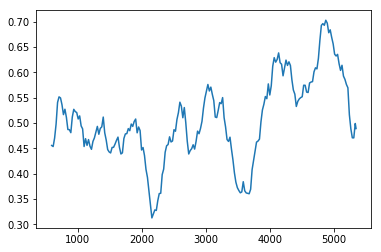

In [29]:
import matplotlib.pyplot as plt
plt.plot(vec_to_sim_dic.keys(),vec_to_sim_dic.values())

In [30]:
val = list(vec_to_sim_dic.keys())[-1]//one_topic + 1
val
part = []
for i in range(val):
    p = [value for idx, value in vec_to_sim_dic.items() if one_topic*i< idx <=one_topic*(i+1)]
    part.append(p)
part_min = []
for p in part:
    part_min.append(min(p))
part_min
sort_min_list=sorted(part_min)
sort_min_list

[0.31245512466550673,
 0.36017695773611436,
 0.3620277018452938,
 0.45331970588085596,
 0.47044876950803266]

In [31]:
minimum1_1=[token_num for token_num, val in vec_to_sim_dic.items() if val ==sort_min_list[0]]
minimum1_2=[token_num for token_num, val in vec_to_sim_dic.items() if val ==sort_min_list[1]]
#minimum1_3=[token_num for token_num, val in vec_to_sim_dic.items() if val ==sort_min_list[2]]
print(minimum1_1)
print(minimum1_2)
#print(minimum1_3)

[2156]
[3674]


In [32]:
minimum=[minimum1_1[0]].copy()
minimum.append(minimum1_2[0])
#minimum.append(minimum1_3[0])

In [33]:
sort_minimum=sorted(minimum)
sort_minimum

[2156, 3674]

In [34]:
k=2
min_key = []
for i in range(k):
    minimum = [token_num for token_num, val in vec_to_sim_dic.items() if val ==sort_min_list[i]]
    min_key.append(minimum[0])
print(min_key)
sort_min_key=sorted(min_key)
print(sort_min_key)

[2156, 3674]
[2156, 3674]


In [35]:
token_list_allword[sort_min_key[0]]
idx1 = token_list_allword[sort_min_key[0]].index
lexrank.sentences[idx1].text

'음, 근데 또 어떻게 뽑겠어 또 근데, 그 치? 임용고시 다 봐서 뽑으면 안 되나? 그런 방법도 있는데, 음, 사립 고등학교 같은 경우는, 대학교랑 은 달라서::, 어떤 그~ 사립 학교를 운용한다고 해서, 음, 크게 머~ 이 문이 남는다거나 그런 건 아니거든? 장사 속으로 못하는::, 그런 거기 때문에, 이사진들이 첨에 학교를 세울 때는, 그런 자기들 만에 그~, 내 손녀도 선생님 시켜 주고, 뭐~ 그런 계산이 어느 정도, 바탕이 깔려 있기 때문에, 포 길하지 않으려고 한다고 하더라고'

In [36]:
## 찾아낸 경계 토큰으로 클러스터 나누기
## 토큰이 문장의 앞뒤로 나눈 절반 중 어디에 속한지 알아내서 경계 나눔
start = 0
cluster = []
for b in sort_min_key:
    token = token_list_allword[b]
    idx = token.index
    sen_tokens = [t.word for t in lexrank.sentences[token.index].tokens]
    pos = sen_tokens.index(str(token))
    if(pos<len(sort_min_key)//2):
        cluster.append(lexrank.sentences[start:idx+1])
        start=idx+1
    else:
        cluster.append(lexrank.sentences[start:idx])
        start=idx
if(start<len(lexrank.sentences)):
    cluster.append(lexrank.sentences[start:])
## 클러스터별 문장과 각 페이지랭크 값 출력
for i, c in enumerate(cluster):
    print("[cluster{}]".format(i+1))
    for j, s in enumerate(c):
        print("문장{}: {}".format(j, s.text))

[cluster1]
문장0: 음~ 제가 교생 실습 갔다 온 얘기 해 드릴게요, 그래, 되게 궁금하다, 아~ 그래 갖구::, 저희 교생이 되게 많았었거든요::, 그런데 저는, 인제, 제가 나이가 제일 어렸어요 ::, 생각보다 나이 많은 사람들이 되게 많았거든요? 음 음, 언니는 구오, 구오 학번, 아 유~, 그런 얘기를 여기서 하면, 구오 학번까지 막~, 음::, 그래 갖구, 근데, 저는 졸업한 지 사 년밖에 안 돼서::, 나도 되게 어리다고 생각을 했었는데, 애들을 보니까 세대 차이가 엄청 나는 거예요, 음::, 걔네들은 정말, 걔들이 메일을 보내면 진짜 못 읽겠는 거예요 막, 난 읽을 줄 아는데, 머~ 아리용, 아리용이 무슨 뜻이에요? 아리용? 음 음, 선생님 아리용 맨날 그러는데 무슨 말인지 몰라 가지고, 모르겠다, 사투리 아니야? 어, 아니에요, 아니거든요, 선생님 아 룡? 어, 아 룡? 어, 아리용:: 맨날, 아리 영 아리 영 그거 아니야? 인어 아가씨에 나오는 거? 그래 가지고 맨날 그러고, 어, 특수문자도 엄청 많이 쓰고, 문자를 보 내도 알아볼 수가 없는, 음::, 막 그런 문자를 쓰고, 인기가 많았다는 것을, 아예 문자 잘 안 오는데, 막 남자 교생들은::, 걔네들이 음료수 맨날 뽑아 주고::, 여자 중학교? 여자 고등학교, 고등학교, 그렇지, 이해해 줘야지, 걔네들은 정말 남자 교생들은 쌓아 놓고 먹고, 우리는 뽑아 먹고, 남자 교생이 안 줘 재향이, 음, 문제 있네, 받은 받은 거라고, 못 준대요, 그랬어요, 어~ 근데 교생 실습 나가 가지구::, 우리 그~ 교육 문제를 우리가, 교실 안에서만 배우다가::, 현장에 직접, 음, 가 본 거잖아? 근데 나는 실습을 못 나가봤기 때문에::, 음, 그런 게 궁금한 데::, 가르쳐 보면서 가장, 문제가 됐다고 생각하는 점 있어? 그니까 애들이 공부를 안 해요, 음, 공부를 안 한다, 음, 우리 때보다 훨:: 씬 안 하는 거 같아요, 그~ 혹시 그 학교가, 원래 그~, 인문계 중에서도, 근 까 어, 시험

In [28]:
##학교 -> 대통령선거 -> 직장생활   (순서)

In [37]:
clus1=[]
for s in cluster[0]:
    clus1.append(s.text)
clus2=[]
for s in cluster[1]:
    clus2.append(s.text)
clus3=[]
for s in cluster[2]:
    clus3.append(s.text)

In [38]:
lexrank=LexRank(clustering='birch',useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'])
summary=lexrank.summarize(text=(". ".join(clus1)))
len(clus1)

C:\Users\hm334\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


23

In [39]:
summaries = lexrank.probe(0.3)
for i,summary in enumerate(summaries):
    print(str(i),summary)

0 음~ 제가 교생 실습 갔다 온 얘기 해 드릴게요, 그래, 되게 궁금하다, 아~ 그래 갖구::, 저희 교생이 되게 많았었거든요::, 그런데 저는, 인제, 제가 나이가 제일 어렸어요 ::, 생각보다 나이 많은 사람들이 되게 많았거든요? 음 음, 언니는 구오, 구오 학번, 아 유~, 그런 얘기를 여기서 하면, 구오 학번까지 막~, 음::, 그래 갖구, 근데, 저는 졸업한 지 사 년밖에 안 돼서::, 나도 되게 어리다고 생각을 했었는데, 애들을 보니까 세대 차이가 엄청 나는 거예요, 음::, 걔네들은 정말, 걔들이 메일을 보내면 진짜 못 읽겠는 거예요 막, 난 읽을 줄 아는데, 머~ 아리용, 아리용이 무슨 뜻이에요? 아리용? 음 음, 선생님 아리용 맨날 그러는데 무슨 말인지 몰라 가지고, 모르겠다, 사투리 아니야? 어, 아니에요, 아니거든요, 선생님 아 룡? 어, 아 룡? 어, 아리용:: 맨날, 아리 영 아리 영 그거 아니야? 인어 아가씨에 나오는 거? 그래 가지고 맨날 그러고, 어, 특수문자도 엄청 많이 쓰고, 문자를 보 내도 알아볼 수가 없는, 음::, 막 그런 문자를 쓰고, 인기가 많았다는 것을, 아예 문자 잘 안 오는데, 막 남자 교생들은::, 걔네들이 음료수 맨날 뽑아 주고::, 여자 중학교? 여자 고등학교, 고등학교, 그렇지, 이해해 줘야지, 걔네들은 정말 남자 교생들은 쌓아 놓고 먹고, 우리는 뽑아 먹고, 남자 교생이 안 줘 재향이, 음, 문제 있네, 받은 받은 거라고, 못 준대요, 그랬어요, 어~ 근데 교생 실습 나가 가지구::, 우리 그~ 교육 문제를 우리가, 교실 안에서만 배우다가::, 현장에 직접, 음, 가 본 거잖아? 근데 나는 실습을 못 나가봤기 때문에::, 음, 그런 게 궁금한 데::, 가르쳐 보면서 가장, 문제가 됐다고 생각하는 점 있어? 그니까 애들이 공부를 안 해요, 음, 공부를 안 한다, 음, 우리 때보다 훨:: 씬 안 하는 거 같아요, 그~ 혹시 그 학교가, 원래 그~, 인문계 중에서도, 근 까 어, 시험 보고 들어가는 학교, 요

In [40]:
lexrank=LexRank(clustering='birch',useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'])
summary=lexrank.summarize(text=(". ".join(clus2)))
len(clus2)

C:\Users\hm334\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


97

In [41]:
summaries = lexrank.probe(0.3)
for i,summary in enumerate(summaries):
    print(str(i),summary)

0 음::~ 노무현, 이거 너무 맛있다야, 노무현 대통령은 단적으로 말해서, 지금까지 그 뭐냐, 가장 우려하던 면이, 대통령이 된다 하더라도, 저~ 그::~, 기반이 되야 될 그 세력이 없다는 거
1 그런 분들은, 노무현 대통령을 기피하는 면이 많았지
2 저 사람이 설령 대통령이 된다 하더라도::, 그 밑에 사람들이 이제 다::, 그 반 노무현 세력들이기 때문에, 음::~ 대통령 되면 오히려 나라가 더 혼란스러워 질 거다
3 김대중, 대통령, 국민의 정부
4 이렇게 이어 나오는 과정에서도::, 그 뿌리 깊었던 인제 군사 시절부터의 그 기존 세력들이라 든가, 기득권들의, 그:: 권력이라는 게 쉽게 없어 지지 않았거든? 근데 이게 김대중:: 정권과, 노무현 정권을 통해 가지고, 그 수단이 어떻든 결과적으로는, 좀 뭔 가, 새로운 권력이 대두되는 이제 새 시대가 열렸다고 할 수 있지
5 물론 이 슨 이런 새로운 권력들은 또 세월이 지나면 기득권이 될 거고, 뭐::~, 지금 당장 뭐~ 큰:: 뭐~ 변화의 기대를 가진다는 건 무리겠지만, 적어도, 이제, 그 새 술을 새 부대에 담듯이, 노무현 대통령이 되면서, 이제 새로운 부대를, 음::~ 그렇게 만들어 내는 그런 계기가 되지 않았나 하는 생각이 들어
6 하지만 정치인들의:: 그 특징을 그~ 못 보던 사람은 다 그렇겠지만, 자기 개인의 이익을 쫓는 사람들이고, 음::~ 쫌 전에도 말했듯이, 이제, 하나의 거대한 세력 때문에 억눌려 있던, 그런 정치인들이, 이제 새로운 세력을 만들어 가면서 이제 전혀 뭔 가 좀 이제 기존보다, 기존과 전혀 다른, 새로운 권력이, 대두되기 때문에, 이를 통해서::, 국민들에게 뭔 가 좀 새로운 모습을 보여 줘야 되거든? 그러기 때문에, 설령 그 속은 쏙은 좀 시커멓고, 막 뭐~ 뭐~ 똑같다 치더라 할지라도, 표면적으로는 뭔 가 이제, 변화의 기회가 될 수 있다
7 그 티비 토론하는 거 봤었어요? 아니? 쪼금 쪼금 보다 말았어, 그~ 그~ 예:: 그~ 봤는데, 어, 권 영 길 씨가 하는 말이

In [42]:
lexrank=LexRank(clustering='birch',useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'])
summary=lexrank.summarize(text=(". ".join(clus3)))
len(clus3)

C:\Users\hm334\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


130

In [43]:
summaries = lexrank.probe(0.3)
for i,summary in enumerate(summaries):
    print(str(i),summary)

0 딴 거는:: 그래 관리부에서 있으면서, 금액하고 관련된 거 뭐, 여러 가지 인제 뭐, 돈 하구 관련 돼 갖구:: 뭐~ 우리 수출입 업무 하잖아, 그래 갖구 우리 통관 오구 그러는 거 있으면::, 뭐~ 금액 얼마 해 갖구 관세 얼마 그런 거 쭈루룩 다 오거든, 그런 거하구 관련해서 정리는 정말, 예전에는 그런 거 자체두::, 어떤 건지 잘 파악이 안 됐었는데 지금은 그런 거 딱 들어오면 은, 또 이거 어떻게 어떻게 어느 현장에 투입을 하는구나 금액을::, 그런 거는 잘 파악해 갖구 정리는 잘 해 놓는다 논다 그런 거는, 그런 면에서는, 근데, 지금 과장님이 내가, 어::~ 딱 본격적으로 우리 부서 일만 딱 하기 시작한 거는, 삼월 초라고 할 수 있는데, 그 전 까지는 계속 인제, 관리부에서 쪼금 뒤에:: 뭐~ 처리 안 된 거 그런 거는 계속 정리하고, 그러느라고 그러니라고 쫌 우리 부서 일 쫌 소홀히 했고
1 쓸 수 있겠어 그런 거는:: 인제 어느 것 틀이 쫌 보이니깐, 근데 그 가운데 말들 있지, 어느 정도 - 그건 너가 써야 되는 거? 어, 현장 파악을 하고 있어야 되고, 어떻게 어떻게 써야 될지::, 내가 어느 정도는 생각을 하고:: 그렇게 써야 돼::, 딱 팩스들 여태까지 온 쭈루룩 팩스들 보면서, 근데 거기 있어서, 나 말구 내 밑으로 들어온 신입사원 있잖아, 남자 애? 어, 남자 그 사람은, 정말 들어온 지 별로 안 돼서, 너무너무 파악 파악도 잘하구, 딱 조리 있게::, 인제 그거에 대해서 인제~ 어느:: 현장이나 그 대만 우리 대만 하구 많이 관련이 돼 갖구 대만 현장에다 전화를 하거든? 그러면은 그거에 대해서, 또 보고, 느낀 게 있어서 그런지 모르겠는데 대만 현장에서 한 달 생활했다고 그랬잖아 ::, 처음에 입사한 지 별로 안 돼서, 뭐 조립이 어떻게 돼 있는지 그런 과정과정도 많이 물어 보고 그랬다? 나는 근데::, 과장님이나 재영 씨나, 딱, 거기 들어가 있으면은 연락을 하라구 하거든? 그래서 연락 하면은, 나는 그 상황에 대해서 잘 모

In [44]:
#########NOISE########

In [45]:
lexrank=LexRank(clustering='birch',useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'])
summary=lexrank.summarize(text=(". ".join(clus1)))

C:\Users\hm334\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [46]:
clus1_sorted = lexrank.sentences
clus1_sorted = sorted(clus1_sorted, key=lambda x: x.pagerank, reverse=True)
for s in clus1_sorted:
    print(s.text)
    print(s.pagerank)

내가 어렸을 때는 내가, 멍청해서 그런지 모르지만, 음, 몰라 어릴 때는:: 돈을 많이 벌어야 된다 든가::, 사회적 성공이라는 것이 꼭 돈과 직결되고 이런 것 들이 아니라고 생각을 했는데, 요즘 애들은::, 되게 빨리 거기에 눈을 뜨는 거 같은 게, 옛날에 그~ 학원 강사를 하는데 애가, 선생님 집 몇 평이에요? 대화가, 뭐~ 너 네 집 차 뭐야, 니 네 집 몇 평에 살아, 머 이런 거, 아빠 뭐하셔 막 이런 것 들 보면서, 내가 얘네 들 어떻게 가르쳐야 되나 생각을 많이 했거든? 그런 면에서는, 세상이 정말 많이 바뀐 거 같고, 음, 참, 앞으로 우리가, 교사가 돼서 아이들을 가르쳐야 되는데::, 숙제가 정말 많이 남겨 진 거 같애서::, 그렇거든, 공부를 안 한다는 거 외에는 다른 문제는 없는 거 같애? 공부를 안 하구, 그것만 고쳐 지면 퍼펙트 해, 아~ 그리고 애들이:: 정말, 표현을 직접적으로 해야 한다고 그래야 되나? 직설적으로, 예 예, 정말, 근 까, 하지 말아야 될 말들도, 우리가 친구 같아서 그런 건지 모르겠지만, 그런 말들 되게 많이 해서, 막 상처 받구 막~, 음::, 그런 적이, 제 친구가::, 근 까, 첫 시간에 소개를 하고:: 인제, 질문을 하라고, 궁금한 거 있으면::, 질문하라 그러니까, 애들이 남자친구 있냐고::, 그래서 내 친구가, 남자친구 있거든요, 그래서 막 기분 좋아 가지고 막~, 있을 거 같애요 없을 거 같애요 이러니까, 애들이 한결같이 입을 모아서, 없을 거 같애요 막, 그래 갖고 되게 상처를 받았는데, 그냥 있다고 하지, 왜 그랬을까, 근 까, 그 중에 또 한 명이::, 요즘 요즘 남자들은 얼굴 안 보니까 있을지도 모르죠 막, 그런 말을, 어::, 못생겼어 친구가? 어~ 그냥, 평범한 데, 못생겼구나, 어::, 근데, 내가, 나는, 우리가, 명문대 생이지? 그 치? 어띃게, 하이튼, 어띃게, 운이 좋아서 그랬는지, 딱 들어왔는데, 엘리트, 교육에 있어서::, 엘리트 교육이 되게 잘 못됐다고 나는 항상 생각을 해왔 

In [47]:
clus1_pr=[]
for s in clus1_sorted:
    clus1_pr.append(s.pagerank)

<function matplotlib.pyplot.show(*args, **kw)>

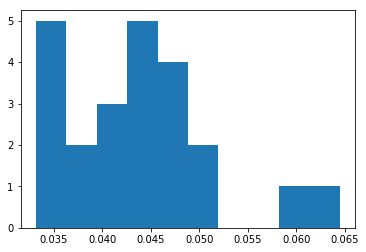

In [48]:
plt.figure()
plt.hist(clus1_pr)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

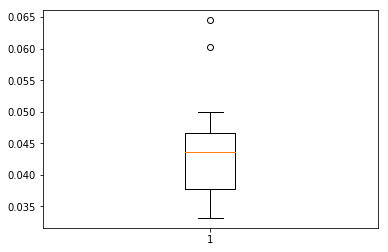

In [49]:
plt.figure()
plt.boxplot(clus1_pr)
plt.show

In [50]:
np.percentile(clus1_pr, 25)

0.03778460563676435

In [51]:
for s in clus1_sorted:
    print(s.text)
    print(s.pagerank)

내가 어렸을 때는 내가, 멍청해서 그런지 모르지만, 음, 몰라 어릴 때는:: 돈을 많이 벌어야 된다 든가::, 사회적 성공이라는 것이 꼭 돈과 직결되고 이런 것 들이 아니라고 생각을 했는데, 요즘 애들은::, 되게 빨리 거기에 눈을 뜨는 거 같은 게, 옛날에 그~ 학원 강사를 하는데 애가, 선생님 집 몇 평이에요? 대화가, 뭐~ 너 네 집 차 뭐야, 니 네 집 몇 평에 살아, 머 이런 거, 아빠 뭐하셔 막 이런 것 들 보면서, 내가 얘네 들 어떻게 가르쳐야 되나 생각을 많이 했거든? 그런 면에서는, 세상이 정말 많이 바뀐 거 같고, 음, 참, 앞으로 우리가, 교사가 돼서 아이들을 가르쳐야 되는데::, 숙제가 정말 많이 남겨 진 거 같애서::, 그렇거든, 공부를 안 한다는 거 외에는 다른 문제는 없는 거 같애? 공부를 안 하구, 그것만 고쳐 지면 퍼펙트 해, 아~ 그리고 애들이:: 정말, 표현을 직접적으로 해야 한다고 그래야 되나? 직설적으로, 예 예, 정말, 근 까, 하지 말아야 될 말들도, 우리가 친구 같아서 그런 건지 모르겠지만, 그런 말들 되게 많이 해서, 막 상처 받구 막~, 음::, 그런 적이, 제 친구가::, 근 까, 첫 시간에 소개를 하고:: 인제, 질문을 하라고, 궁금한 거 있으면::, 질문하라 그러니까, 애들이 남자친구 있냐고::, 그래서 내 친구가, 남자친구 있거든요, 그래서 막 기분 좋아 가지고 막~, 있을 거 같애요 없을 거 같애요 이러니까, 애들이 한결같이 입을 모아서, 없을 거 같애요 막, 그래 갖고 되게 상처를 받았는데, 그냥 있다고 하지, 왜 그랬을까, 근 까, 그 중에 또 한 명이::, 요즘 요즘 남자들은 얼굴 안 보니까 있을지도 모르죠 막, 그런 말을, 어::, 못생겼어 친구가? 어~ 그냥, 평범한 데, 못생겼구나, 어::, 근데, 내가, 나는, 우리가, 명문대 생이지? 그 치? 어띃게, 하이튼, 어띃게, 운이 좋아서 그랬는지, 딱 들어왔는데, 엘리트, 교육에 있어서::, 엘리트 교육이 되게 잘 못됐다고 나는 항상 생각을 해왔 

In [52]:
lexrank=LexRank(clustering='birch',useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'])
summary=lexrank.summarize(text=(". ".join(clus2)))

C:\Users\hm334\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [53]:
clus2_sorted = lexrank.sentences
clus2_sorted = sorted(clus2_sorted, key=lambda x: x.pagerank, reverse=True)
clus2_pr=[]
for s in clus2_sorted:
    clus2_pr.append(s.pagerank)
np.percentile(clus2_pr, 25)

0.058902252223511184

In [54]:
for s in clus2_sorted:
    print(s.text)
    print(s.pagerank)

아무튼 뭐~ 정치::, 군대 단축되는 거는 나는 솔직히 단축돼야 된다 생각하거든요? 음, 저기~ 나는 쫌, 이 년 이 개월 쫌, 쓸데없이 간 거 같은데, 어, 군대에서 청춘을 불 태우고, 어, 그냥, 밑 밑에 애들은 쫌 이렇게 안 했으면 솔직한 그런 바램이거든요
0.5000000000000001
김대중, 대통령, 국민의 정부
0.5
국민의 정부
0.5
그 티비 토론하는 거 봤었어요? 아니? 쪼금 쪼금 보다 말았어, 그~ 그~ 예:: 그~ 봤는데, 어, 권 영 길 씨가 하는 말이, 음
0.5
그::~ 막 막 비리 척결에 대해서 부정부패 척결에 대해서 어떻게 생각하냐 니 까, 아:: 그 거, 어, 막 서로 막 민주당 쪽이랑 한나라당이 얘기하니까 권 영 길 씨가 하는 얘기가 어, 한나랑 당은 원조 부패 당 이요, 어, 민주 당은 신장 개업 당인데 뭘 할 말 있냐고, 어, 근데 그 말이 너무 웃기면서도::, 진짜 막 뒤통수 딱 때리는 그런 말이잖아요
0.5
뭐~ 이번 정권 하면은 쫌 더 좋아질 그런 뭐~ 과도기다 과도기 맨날 그러다 보면 은, 음
0.5
결국 별루 좋아진 건 없구 제자리에 다가, 맨날 그런 거 있었잖아요
0.5
그런 거지
0.5
음::, 변할:: 변화의 시기에:: 항상, 음::~ 새로움이, 대두될 수 있거든? 그러기 때문 따 문 변화의 시기라는 좀 측면에서, 긍정적으로 바라볼 뿐이지 뭐~ 저 사람이, 엄청나게 정치를 잘할 거라는 그런 기대는 안 해, 군 발이 들은 엄청 좋아하던데? 응:: 뭐~, 이 년 단축해 준다는 데 당연히 좋아하지! 군 발이 들이 엄청 좋아 하던데, 지금 이미 가 있는 사람은, 음, 효과두 없어? 지금
0.5
지금, 상병 이상 효과가 없대
0.5
의문인데 솔직히 그게 말루 한다 그래두 그게 통과될지 그런 말이 한두 번 나온 것두 아니구::, 응 나 그 말이 지금 왜 나오는 지두 궁금해, 그 여론 여론 몰이 아닌가? 응:: 여론 몰이? 어띃게 보면, 이십대 층에:: 가장 그::, 남자들 잡을 수 있는 그, 뽀인트가 그거잖아요 군대


In [55]:
lexrank=LexRank(clustering='birch',useful_tags=['Noun', 'Verb', 'Adjective', 'Determiner', 'Adverb', 'Conjunction', 'PreEomi', 'Eomi', 'Suffix', 'Alpha', 'Number'])
summary=lexrank.summarize(text=(". ".join(clus3)))

C:\Users\hm334\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [56]:
clus3_sorted = lexrank.sentences
clus3_sorted = sorted(clus3_sorted, key=lambda x: x.pagerank, reverse=True)
clus3_pr=[]
for s in clus3_sorted:
    clus3_pr.append(s.pagerank)
np.percentile(clus3_pr, 25)

0.05971972267559096

In [57]:
for s in clus3_sorted:
    print(s.text)
    print(s.pagerank)

- 그렇게 하고 싶은 마음이 있는데, 음
0.5
여자 여서 그 사람은 왜 그러냐 면 통역을 해야 되니까
0.5
또, 또 뭐, 우리 뭐 수입 한 거 뭐 수입 신고서 같은 거 오면 은 그런 것도 관리해 갖구, 지출 결산해 갖구 제출도 해야 되고, 그런 한 사람이:: 필요로 하거든
0.5
즉각 즉각, 그 까 뭐~, 과장님이 선배 긴 하지만 그것두 있어 약간, 과장님이::, 그 같은 대학교에서 데리고 온 사람이거든 추천 - 음
0.5
한마디로, 뭐냐 한마디로 그 뭐 얘 길 하는데, 과장님이 매일, 그러면서 나 없으면 안 된다고 매일 관리부 사람들한테 는 그러는데, 음, 약간 그래두 속상하지
0.5
나 없어두 뭐~ 거기, 안 되게끔, 내가 이것저것 찾아서 막 해 쓀¼, 하야 해야 하야 - 필요로 하는 사람이 있지
0.5
활동을 되게 많이 했다? 외대 다닐 때:: 학생 회 활동
0.5
그 거? 학생회 활동 회장도 하고, 여기저기 써클도 들어갔구
0.5
하고 어학연수두::, 음
0.5
그래서 지금 사학년이야, 음
0.5
큰 회사 같은 데는 이게 딱, 여사원이라도 자기가 맡은 거 있으면 딱 그 하나의 일만, 딱 하게끔 환경을 만들어 준대::, 작은 회사는 더 이것저것 하지
0.5
어 어, 딱, 우리 회사도 그렇구
0.5
보통 중소기업
0.5
이하 뭐~ 그런 회사들은, 보통 여사원들 뭐~ 능력 있고 그래도, 뭐~ 여자들이 해야 될 심부름 같은 거나 커피 심부름 같은 것도 해야 되고 그런 상황이 많이, 일어나게 된다고, 사실 그런 데서 참 사람들 - 음, 맞어, - 인간성이 좀 드러나는 거 같애
0.5
그리구 차를 정말 많이 마셔
0.5
그리구 은영 씨 ::라고 일 그, 그:: 은영 씨 나보다 한 살 아래:: 라는, 여사원이, 앞에 앉아 있어 가지고 손님들 오면 다 본다? 커피 타는 거, 그리구 나는:: 되게 우리 부서가 딱:: 구석에 있어, 다행이다 야, 응 되게 좋아:: 자리가
0.5
근데 나두 마음은 그렇다? 음 음
0.49999999999999994
그 조립하는 거 어 